In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [4]:
df.duplicated().any()

False

In [5]:
df.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [6]:
df.isna().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

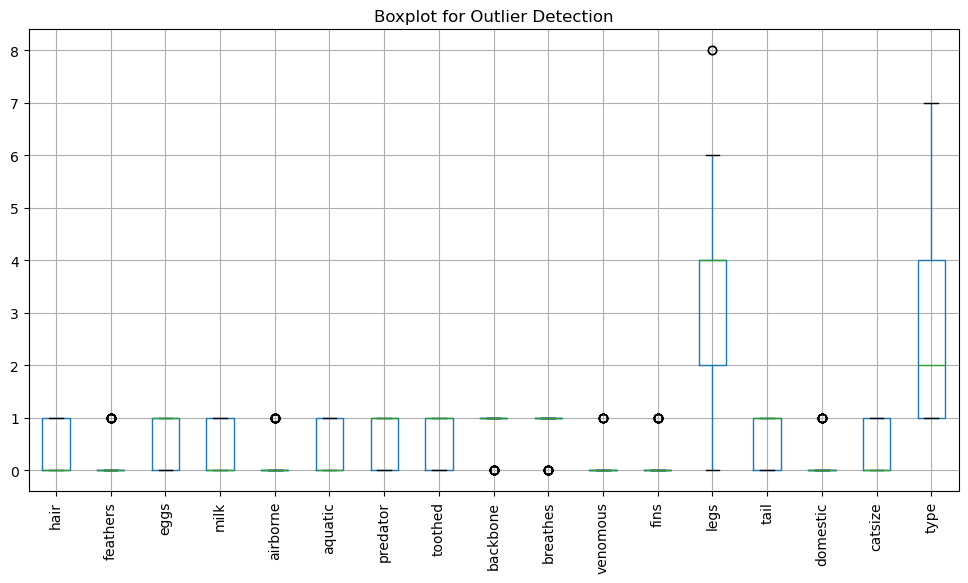

In [7]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [8]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum())

Number of outliers in each column:
 hair         0
feathers    20
eggs         0
milk         0
airborne    24
aquatic      0
predator     0
toothed      0
backbone    18
breathes    21
venomous     8
fins        17
legs         2
tail         0
domestic    13
catsize      0
type         0
dtype: int64


In [9]:
df = df.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df.reset_index(inplace=True)
df

,index,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
5,10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
7,22,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
9,28,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [10]:
df.drop(columns="index",inplace=True)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
5,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
7,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
9,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [11]:
feature=df.iloc[:,1:16]
feature

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
7,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
8,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0


In [12]:
target=pd.DataFrame(df.iloc[:,17])
target

,type
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,5
9,1


## visualization

<Axes: xlabel='type', ylabel='Density'>

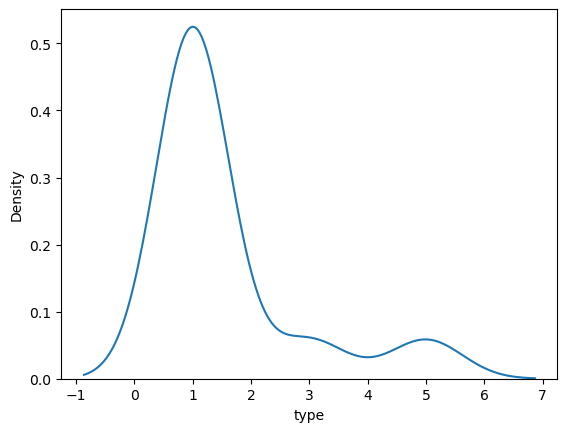

In [14]:
sns.kdeplot(data=df,x="type")

<Axes: ylabel='type'>

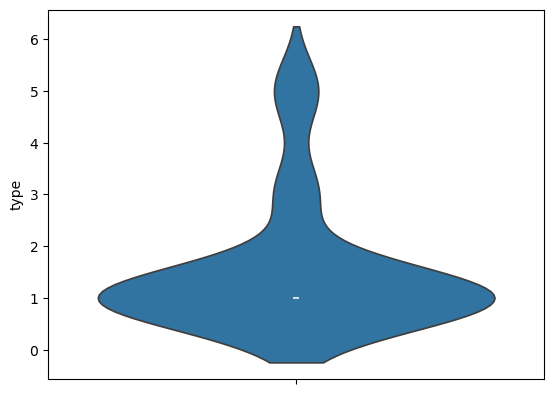

In [15]:
sns.violinplot(data=df,y="type")

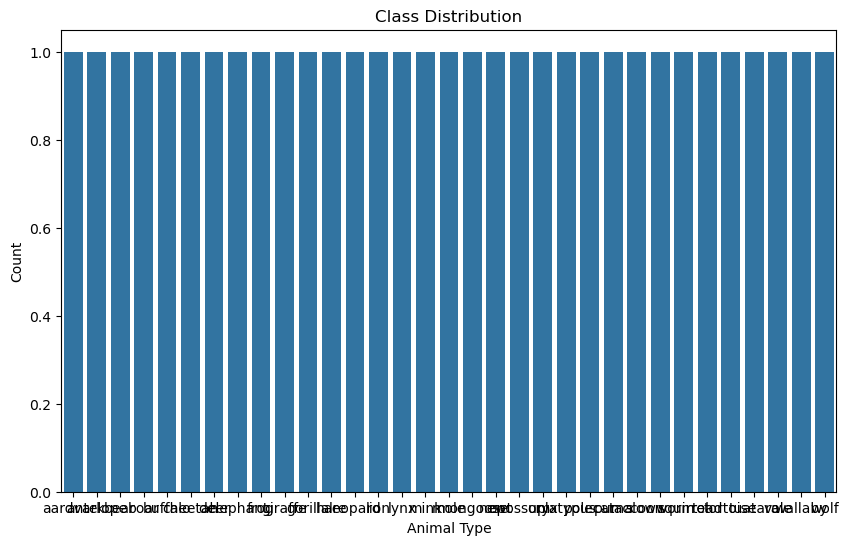

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['animal name'])
plt.title('Class Distribution')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

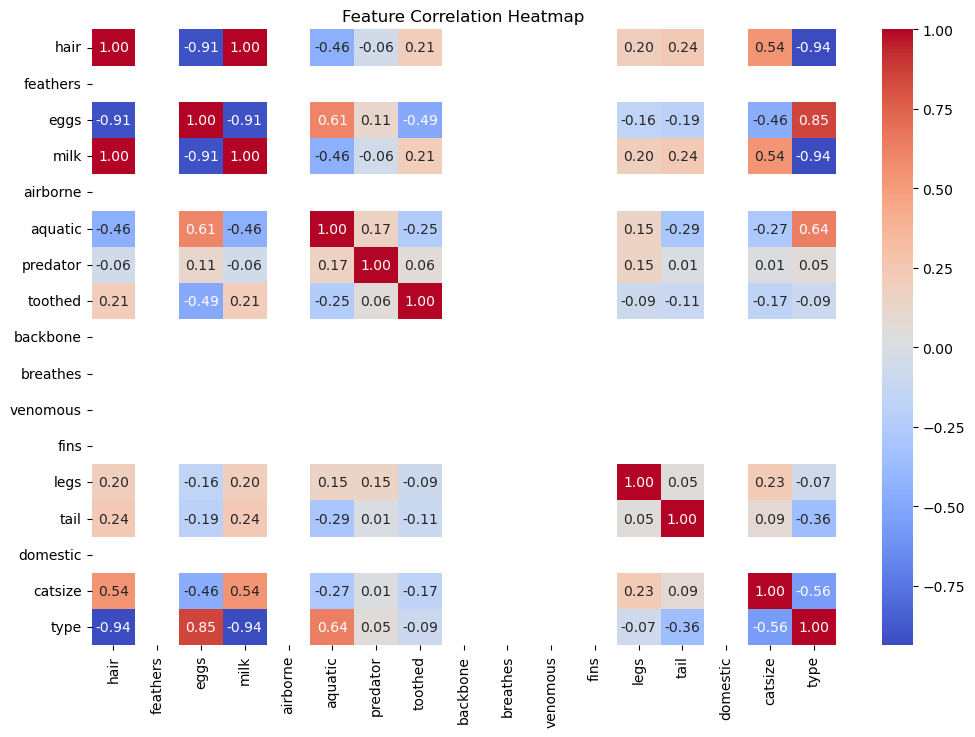

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Building the model

In [19]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size=0.2, random_state=42)

In [20]:
## Elbow method

In [21]:
k_values =[1,9,10,7]
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

In [22]:
accuracy_scores

[1.0, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]

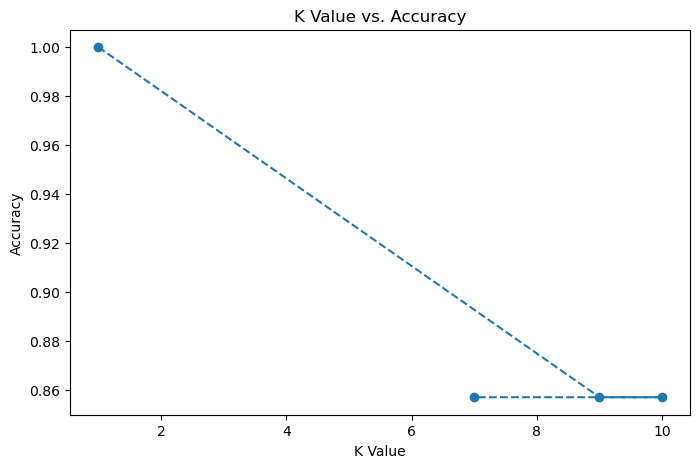

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs. Accuracy')
plt.show()

In [24]:
best_k = k_values[np.argmax(accuracy_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

Confusion Matrix:
 [[6 0]
 [1 0]]


## Decision Boundary

In [27]:
def plot_decision_boundary(X, y, model):
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X = pca.fit_transform(X)
        model.fit(X, y.reshape(-1))  # Ensure y is a proper 1D array
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


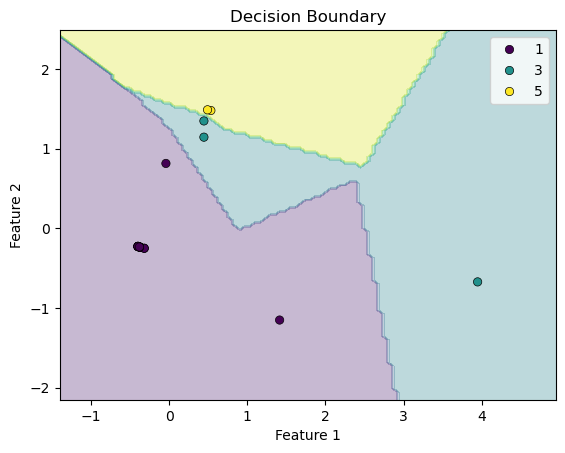

In [28]:
plot_decision_boundary(x_train, np.array(y_train).ravel(), knn)  # Convert y_train to NumPy 1D array

## Interview Questions
What are the key hyperparameters in KNN?

1.n_neighbors (K value)
Defines the number of nearest neighbors considered for classification.
Low K (e.g., 1-3) leads to high variance (overfitting).
High K (e.g., >10) smooths decision boundaries but may cause underfitting.

2.metric (Distance Metric)

Determines how distances between data points are calculated.
Euclidean Distance (default) – best for continuous data.
Manhattan Distance – useful for grid-like structures.
Minkowski Distance – general form (Euclidean & Manhattan as special cases).
Cosine Similarity – for high-dimensional text/vector data.


What distance metrics can be used in KNN?

Euclidean Distance (default) – best for continuous data.
Manhattan Distance – useful for grid-like structures.
Minkowski Distance – general form (Euclidean & Manhattan as special cases).
Cosine Similarity – for high-dimensional text/vector data.

